## Step 1: Load & Inspect Data

### 🔍 Explanation:
- `pd.read_csv()` loads the dataset into a pandas DataFrame.
- `df.info()` helps identify **data types** and **missing values**.
- `df.head()` shows the **first few rows** of the dataset.

This step ensures we understand the dataset **before transforming it**.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
df = pd.read_csv("data/olympics_08_medalists.csv")

# Display basic info
print("Dataset Overview:\n")
print(df.info())

# Display first few rows
df.head()

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   medalist_name                 1875 non-null   object
 1   male_archery                  11 non-null     object
 2   female_archery                9 non-null      object
 3   male_athletics                85 non-null     object
 4   female_athletics              81 non-null     object
 5   male_badminton                12 non-null     object
 6   female_badminton              10 non-null     object
 7   male_baseball                 72 non-null     object
 8   male_basketball               35 non-null     object
 9   female_basketball             36 non-null     object
 10  male_boxing                   44 non-null     object
 11  male_canoeing and kayaking    53 non-null     object
 12  female_canoeing and kayaking  21 non-null     object
 13 

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Tidy Data Transformation
### Why?
The dataset is initially in **wide format**, meaning **sports and gender are combined into one column**. We need to split them into **separate variables**.

### 🔄 Transformations:
- Used `melt()` to **convert sports columns into rows**.
- Applied `str.split('_')` to **separate "gender" and "sport"** into distinct columns.
- Cleaned **sport names** to improve readability.

Now, each row represents **one medalist, one sport, and one medal type** in a **fully tidy format**.

In [101]:
# Convert wide format to long format
df_long = df.melt(id_vars=["medalist_name"], var_name="sport_gender", value_name="medal")

# Drop rows where the medal value is NaN (i.e., no medal won)
df_long = df_long.dropna(subset=["medal"])

# Use str.split() to separate 'sport_gender' into 'gender' and 'sport'
df_long[['gender', 'sport']] = df_long['sport_gender'].str.split('_', n=1, expand=True)

# Clean sport names (replace underscores and standardize text format)
df_long["sport"] = df_long["sport"].str.replace("_", " ").str.title()

# Keep only necessary columns
df_long = df_long[["medalist_name", "sport", "gender", "medal"]].reset_index(drop=True)

# Display transformed data
df_long.head()

,medalist_name,sport,gender,medal
0,Bair Badënov,Archery,male,bronze
1,Ilario Di Buò,Archery,male,silver
2,Im Dong-hyun,Archery,male,gold
3,Jiang Lin,Archery,male,bronze
4,Lee Chang-hwan,Archery,male,gold


## Step 3: Exploratory Data Analysis (EDA)
### Why?
Before visualizing, we **analyze distributions** in the dataset.

### 🔍 Key Insights:
- `value_counts()` helps count **medals by gender**.
- `value_counts()` also shows **distribution of Gold, Silver, and Bronze medals**.
- We find the **top 10 sports with the most medals**.

This step helps us **identify trends** before plotting visualizations.

In [102]:
# Count total medals by gender
gender_counts = df_long["gender"].value_counts()
print("Total Medals by Gender:\n", gender_counts)

# Count medals by type
medal_counts = df_long["medal"].value_counts()
print("\nTotal Medals by Type:\n", medal_counts)

# Count top sports with most medals
top_sports = df_long["sport"].value_counts().head(10)
print("\nTop 10 Sports with Most Medals:\n", top_sports)

Total Medals by Gender:
 gender
male      1032
female     843
Name: count, dtype: int64

Total Medals by Type:
 medal
bronze    668
silver    621
gold      586
Name: count, dtype: int64

Top 10 Sports with Most Medals:
 sport
Athletics                166
Rowing                   141
Swimming                 125
Association Football     109
Field Hockey              98
Handball                  85
Water Polo                78
Canoeing And Kayaking     74
Baseball                  72
Volleyball                72
Name: count, dtype: int64


## Step 4: Aggregation Using Pivot Table
### Why?
A **pivot table** helps **summarize total medals** per **sport and gender**.

### 🛠️ How?
- We use `pivot_table()` to count medals across sports.
- `fillna(0)` replaces missing values with zero.
- Sorting by highest values shows **the most awarded sports**.

In [103]:
# Create a pivot table: Total medals per sport and gender
pivot_table = df_long.pivot_table(index="sport", columns="gender", values="medal", aggfunc="count").fillna(0)

# Sort by most awarded sports
pivot_table = pivot_table.sort_values(by=["male", "female"], ascending=False)
pivot_table.head(10)  # Display top 10 sports

gender,female,male
sport,,
Athletics,81.0,85.0
Rowing,58.0,83.0
Baseball,0.0,72.0
Swimming,63.0,62.0
Association Football,54.0,55.0
Canoeing And Kayaking,21.0,53.0
Field Hockey,48.0,50.0
Boxing,0.0,44.0
Handball,42.0,43.0


## 📊 Visualization 1: Top 10 Sports with Most Medals

### 🔍 Quick Takeaway:
- **Athletics, Rowing, and Swimming** had the highest number of medals.
- **Team sports** like **Association Football, Field Hockey, and Handball** also had significant medal counts.
- Sports with **multiple event categories** tend to have more total medals.

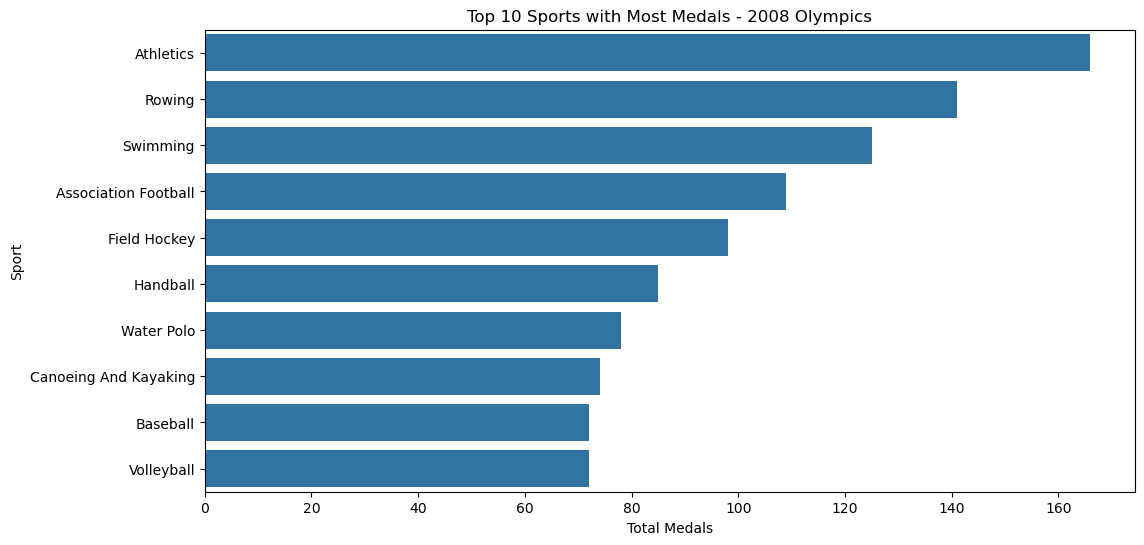

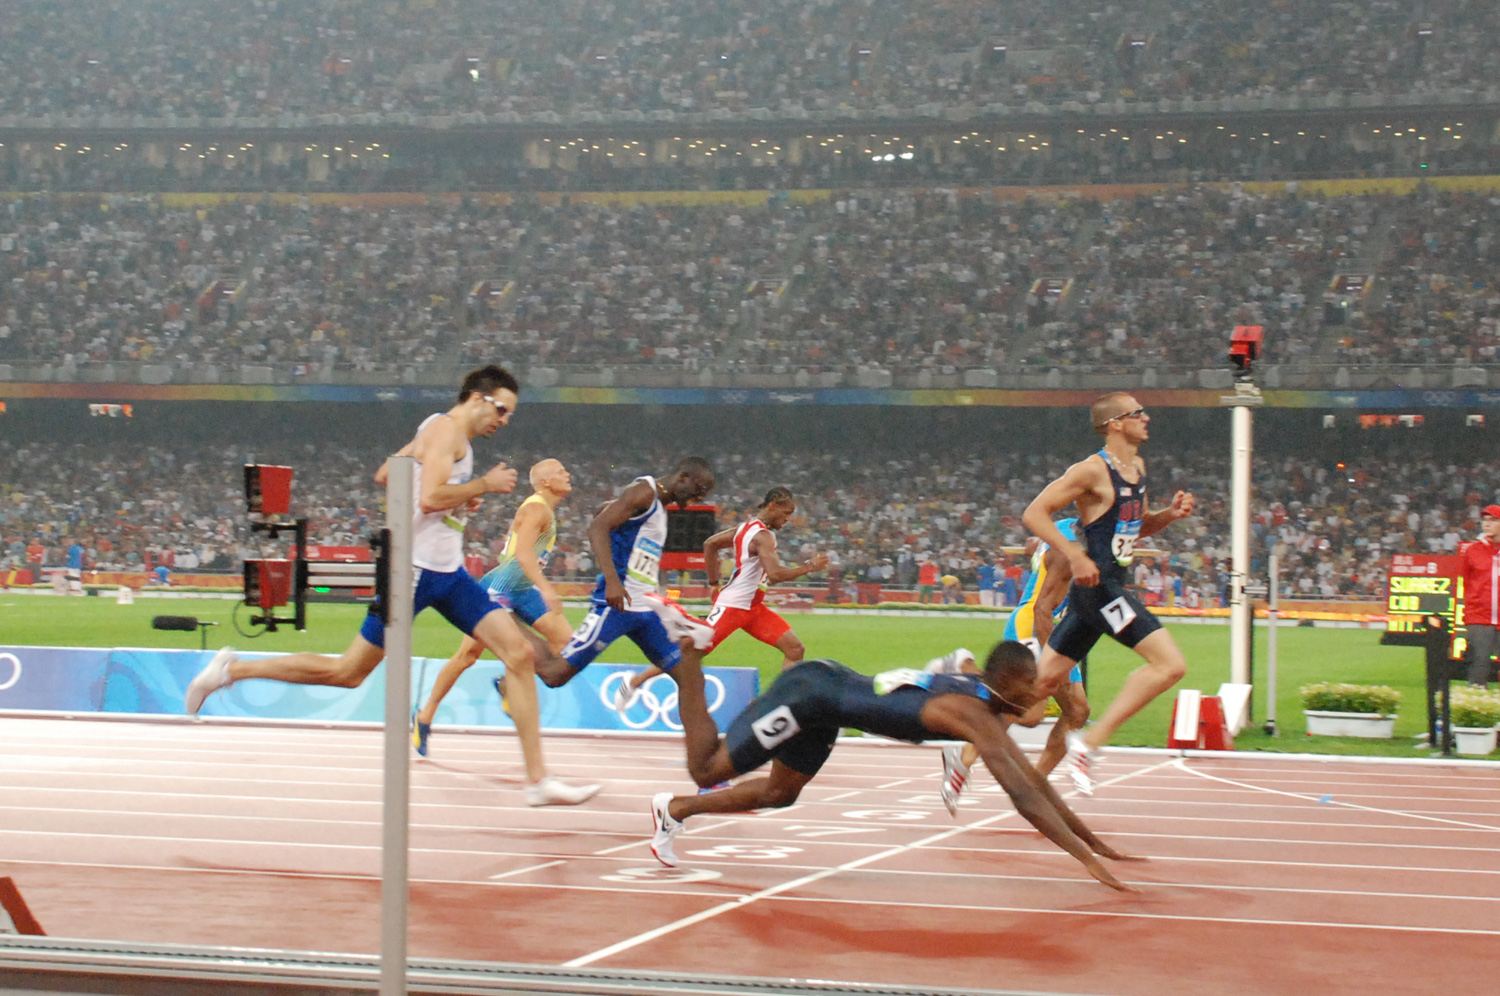

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sports.values, y=top_sports.index)
plt.xlabel("Total Medals")
plt.ylabel("Sport")
plt.title("Top 10 Sports with Most Medals - 2008 Olympics")
plt.show()

from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/6/6c/Warinerbeijing.jpg",
      width = 500)

## 📊 Visualization 2: Medal Distribution by Gender Across Sports

### 🔍 Quick Takeaway:
- Certain sports like **Rhythmic Gymnastics and Synchronized Swimming** are dominated by **female** athletes.
- **Boxing, Greco-Roman Wrestling, and Baseball** had **only male participants** in 2008.
- Other sports such as **Athletics, Swimming, and Fencing** had a more balanced gender representation.

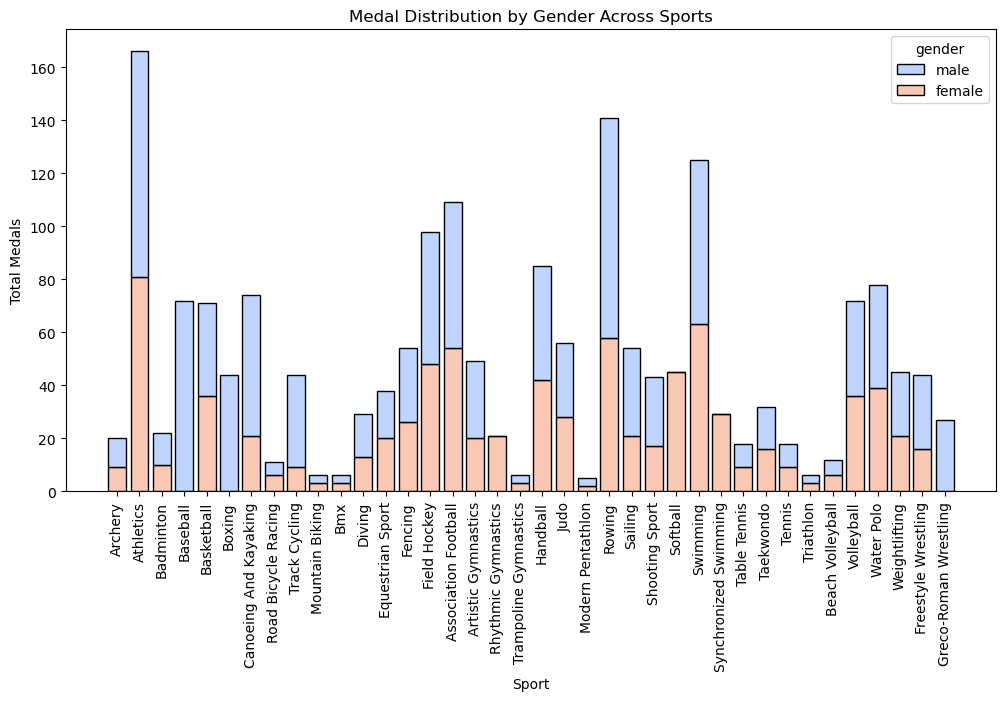

In [114]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_long, x="sport", hue="gender", multiple="stack", palette="coolwarm", shrink=0.8)
plt.xticks(rotation=90)
plt.xlabel("Sport")
plt.ylabel("Total Medals")
plt.title("Medal Distribution by Gender Across Sports")
plt.show()

## 📊 Visualization 3: Medal Distribution by Sport
### Why?
This **boxplot** helps visualize the **distribution of medals across different sports**. It provides insight into **which sports had the most medal events**.

### 🔍 Quick Takeaway:
- **Consistent Medal Spread**: Most sports have a full range of medals (gold, silver, bronze).
- **Variability in Some Sports**: Some sports (e.g., Modern Pentathlon, Handball, Judo) show inconsistent distributions, possibly due to fewer events or team-based competitions.
- **Diversity in Medal Events**: Sports like Athletics, Swimming, and Cycling have wider distributions, indicating more events and medal opportunities.

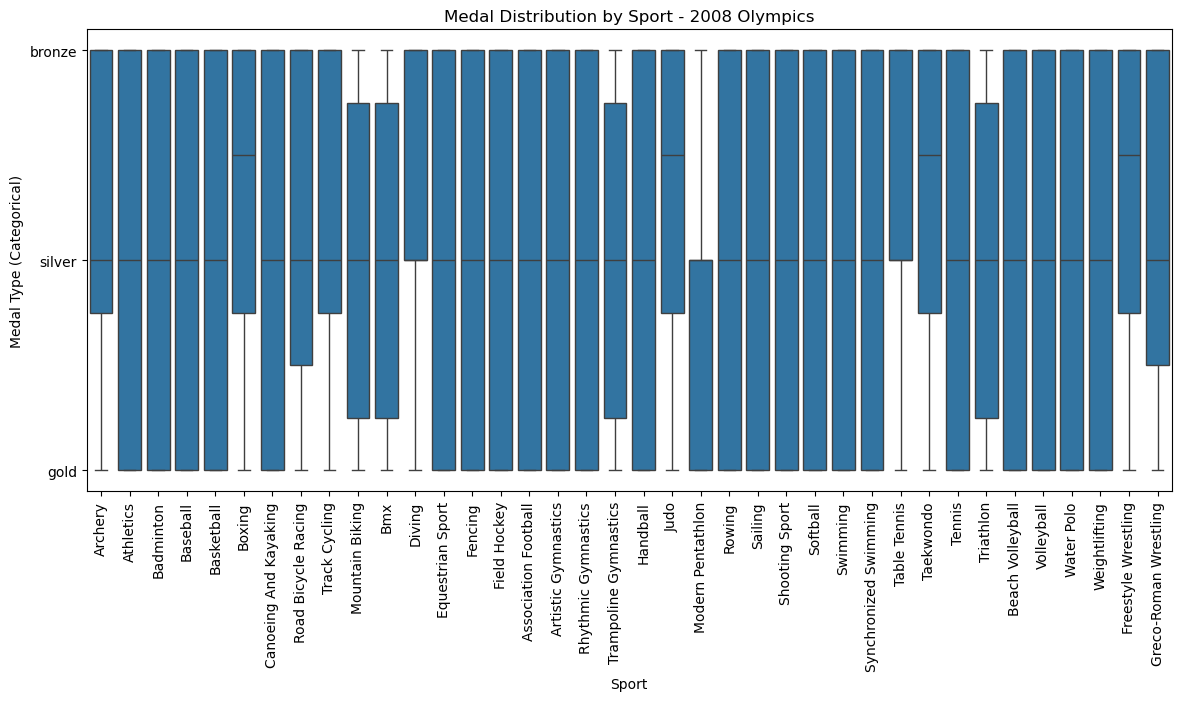

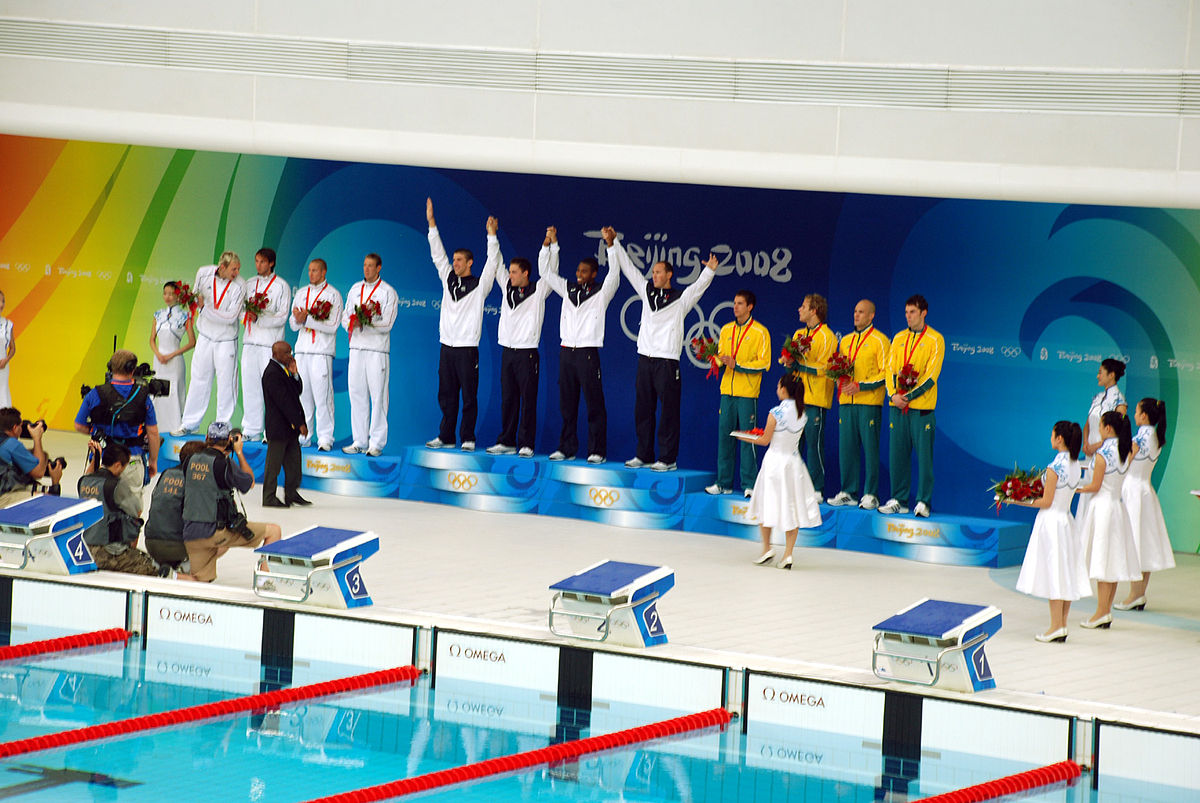

In [116]:
# Count total medals per sport
plt.figure(figsize=(14, 6))
sns.boxplot(x="sport", y="medal", data=df_long)
plt.xticks(rotation=90)
plt.xlabel("Sport")
plt.ylabel("Medal Type (Categorical)")
plt.title("Medal Distribution by Sport - 2008 Olympics")
plt.show()

from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Podium4x100mBeijing.jpg/1200px-Podium4x100mBeijing.jpg",
      width = 500)